<a href="https://colab.research.google.com/github/warwavn/AI-SUT2025/blob/main/D10%20Tokenizer/D10_EX5_TOKENIZATION_(COUNT_VECTORIZER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.11.0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.11.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.11.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/AI_SUT_2025_Workspace/ex5_amazon_alexa - ex5_amazon_alexa.tsv',sep='\t')

In [ ]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
df.columns.tolist()

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

In [ ]:
df.drop(columns=['rating', 'date', 'variation'],inplace = True)

In [ ]:
df.head(20)

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
5,I received the echo as a gift. I needed anothe...,1
6,"Without having a cellphone, I cannot use many ...",1
7,I think this is the 5th one I've purchased. I'...,1
8,looks great,1
9,Love it! I’ve listened to songs I haven’t hear...,1


In [ ]:
neg = df[df['feedback']==0]
neg

,verified_reviews,feedback
46,"It's like Siri, in fact, Siri answers more acc...",0
111,Sound is terrible if u want good music too get...,0
141,Not much features.,0
162,"Stopped working after 2 weeks ,didn't follow c...",0
176,Sad joke. Worthless.,0
...,...,...
3047,Echo Dot responds to us when we aren't even ta...,0
3048,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,The only negative we have on this product is t...,0
3091,I didn’t order it,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   verified_reviews  3070 non-null   object
 1   feedback          3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


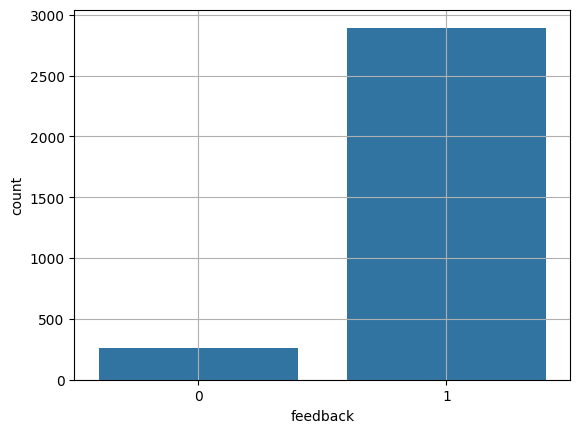

In [ ]:
sns.countplot(x=df['feedback'])
plt.grid()

Count Vectorizer

In [ ]:
df['verified_reviews'] = df['verified_reviews'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorized_data = vectorizer.fit_transform(df['verified_reviews'])

In [ ]:
vectorized_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
review = pd.DataFrame(vectorized_data.toarray())
review

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = review
y = df['feedback']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
x_train.shape

(2520, 4044)

In [ ]:
x_test.shape

(630, 4044)

In [ ]:
input_dim = x_train.shape[1]
# model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(input_dim,)))

In [ ]:
print(input_dim)

4044


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(400,activation='relu',input_shape=(input_dim,)))
model.add(tf.keras.layers.Dense(400,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='tanh'))
# model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))           #multiclass -> softmax
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                     │ (None, 400)                 │       1,618,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,818,601 (6.94 MB)

 Trainable params: 1,818,601 (6.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
              metrics = ['accuracy'])

hist = model.fit(x_train,y_train, epochs = 100, batch_size = 32, validation_split=0.2)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8690 - loss: 0.3681 - val_accuracy: 0.9266 - val_loss: 0.1949
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9722 - loss: 0.0926 - val_accuracy: 0.9306 - val_loss: 0.1998
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.9385 - val_loss: 0.2962
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9325 - val_loss: 0.3119
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9913 - loss: 0.0155 - val_accuracy: 0.9325 - val_loss: 0.2862
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9915 - loss: 0.0171 - val_accuracy: 0.9365 - val_loss: 0.3517
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9940 - loss: 0.0170 - val_accuracy: 0.9385 - val_loss: 0.2857
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9907 - loss: 0.0204 - val_accuracy: 0.

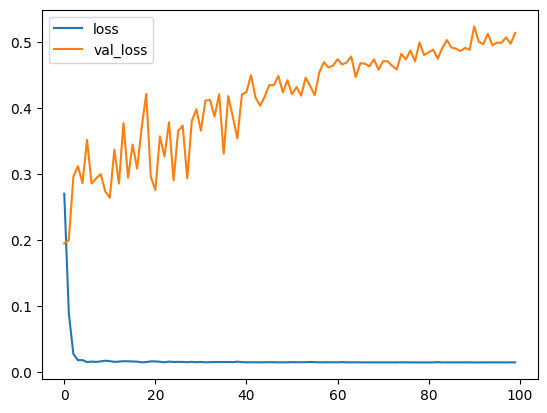

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_train = (y_pred_train > 0.5)

y_pred_test = model.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cmfx_train = confusion_matrix(y_train,y_pred_train)
cmfx_test = confusion_matrix(y_test,y_pred_test)


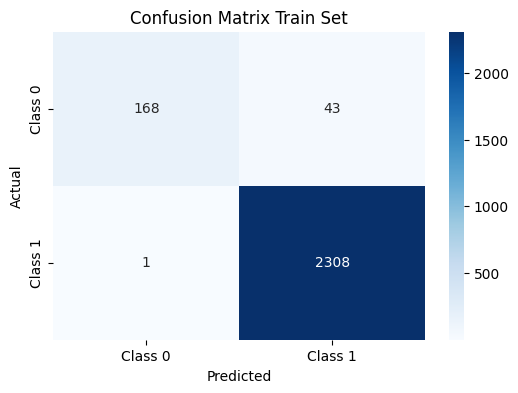

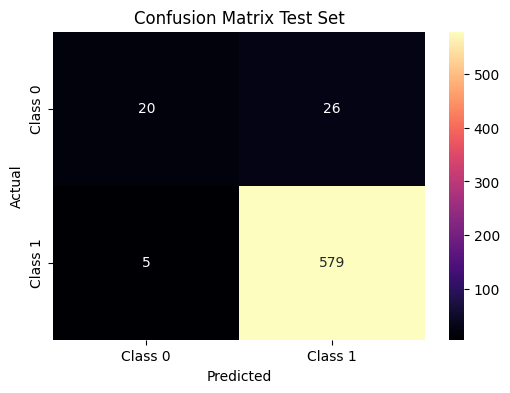

In [ ]:

plt.figure(figsize=(6, 4))
sns.heatmap(cmfx_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

# Customize the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Train Set')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cmfx_test, annot=True, fmt='d', cmap='magma',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
# Customize the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Test Set')
plt.show()

In [ ]:
text = {
    'review2' : ['This product is fast and work good','Very Bad and not satisfied',
                 'look good but there are something bad','to the trash']
}

df2 =pd.DataFrame(text)

vec2 = vectorizer.transform(df2['review2'])
review2 = pd.DataFrame(vec2.toarray())

In [ ]:
vec2_predict = model.predict(review2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [ ]:
vec2_predict

array([[0.9999934],
       [0.9999781],
       [0.9999962],
       [0.3043306]], dtype=float32)